Looking at all the STIS (and eventually all of the UV?) data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
import stistools
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
from scipy.io.idl import readsav


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [2]:
path = '/media/david/5tb_storage1/muscles/stis_x1ds/'
allspecs = np.hstack((glob.glob(path+'*x1d.fits'), glob.glob(path+'*sx1.fits')))
#allspecs
stars = os.listdir(path)
stars


['2MASS-J23062928-0502285',
 'GJ1132',
 'GJ15A',
 'GJ163',
 'GJ649',
 'GJ674',
 'GJ676A',
 'GJ699',
 'GJ729',
 'GJ849',
 'L-980-5',
 'LHS-2686']

In [3]:
"""stars = []
gratings = []
for x in allspecs:
    hdr = fits.getheader(x)
    star = hdr['TARGNAME']
    if star != 'LP-756-18':
        stars.append(star)
        gratings.append(hdr['OPT_ELEM'])
    
stars = np.unique(stars)
gratings = np.unique(gratings)
print(stars)
print(gratings)"""

"stars = []\ngratings = []\nfor x in allspecs:\n    hdr = fits.getheader(x)\n    star = hdr['TARGNAME']\n    if star != 'LP-756-18':\n        stars.append(star)\n        gratings.append(hdr['OPT_ELEM'])\n    \nstars = np.unique(stars)\ngratings = np.unique(gratings)\nprint(stars)\nprint(gratings)"

In [4]:
"""for star in stars:
    print(star)
    for x in allspecs:
        hdr = fits.getheader(x)
        if hdr['TARGNAME'] == star:
            if hdr['OPT_ELEM'] not in ['G140M', 'E140M']:
                data = fits.getdata(x, 1)[0]
                w, f , e , dq = data['WAVELENGTH'],data['FLUX'], data['ERROR'],data['DQ']
              #  w, f, e = w[dq ==0], f[dq ==0], e[dq ==0]
                plt.step(w, f, where='mid')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()"""

"for star in stars:\n    print(star)\n    for x in allspecs:\n        hdr = fits.getheader(x)\n        if hdr['TARGNAME'] == star:\n            if hdr['OPT_ELEM'] not in ['G140M', 'E140M']:\n                data = fits.getdata(x, 1)[0]\n                w, f , e , dq = data['WAVELENGTH'],data['FLUX'], data['ERROR'],data['DQ']\n              #  w, f, e = w[dq ==0], f[dq ==0], e[dq ==0]\n                plt.step(w, f, where='mid')\n    plt.xscale('log')\n    plt.yscale('log')\n    plt.show()"

In [5]:
#import prepare_stis

In [6]:
#prepare_stis.make_stis_spectum(path, 1, savepath = 'stis_test_output/', plot=False, save_ecsv=True, save_fits=False)

In [7]:
os.listdir('stis_test_output')

['L-980-5',
 'GJ674',
 '2MASS-J23062928-0502285',
 'GJ676A',
 'GJ649',
 'GJ699',
 'GJ163',
 'GJ849',
 'GJ1132',
 'LHS-2686',
 'GJ729',
 'GJ15A']

In [8]:
"""for star in stars:
    specs = np.hstack((glob.glob(path+'*x1d.fits'), glob.glob(path+'*sx1.fits')))
    for x in specs:
        if x in specs:
            hdr = fits.getheader(x)
            if hdr['TARGNAME'] == star:
                filename = os.path.split(x)[1]
                #print(filename)
                os.rename(x, path+star+'/'+filename)
            """

"for star in stars:\n    specs = np.hstack((glob.glob(path+'*x1d.fits'), glob.glob(path+'*sx1.fits')))\n    for x in specs:\n        if x in specs:\n            hdr = fits.getheader(x)\n            if hdr['TARGNAME'] == star:\n                filename = os.path.split(x)[1]\n                #print(filename)\n                os.rename(x, path+star+'/'+filename)\n            "

In [21]:
import prepare_stis
for star in stars:
    prepare_stis.make_stis_spectum(path+star+'/', 1, savepath = 'stis_test_output/'+star+'/', plot=False, save_ecsv=True, save_fits=False)

/home/david/work/muscles/SEDs/common/prepare_stis.py:31: RuntimeWarning: divide by zero encountered in true_divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:422: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


Spectrum saved as hlsp_muscles_hst_stis_2mass-j23062928-0502285_g140m_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_2mass-j23062928-0502285_g430l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj1132_g140m_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj1132_g230l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj1132_g430l_v1_component-spec.ecsv
yes
Spectrum saved as hlsp_muscles_hst_stis_gj15a_e140m_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj15a_g230lb_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj15a_g430l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj163_g140m_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj163_g230l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj163_g430l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj649_g140l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj649_g140m_v1_c

2MASS-J23062928-0502285


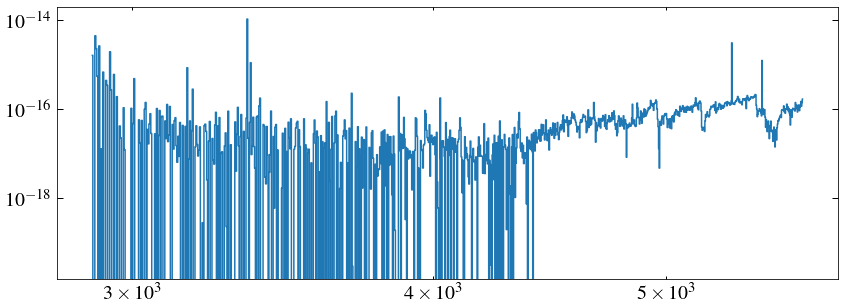

GJ1132


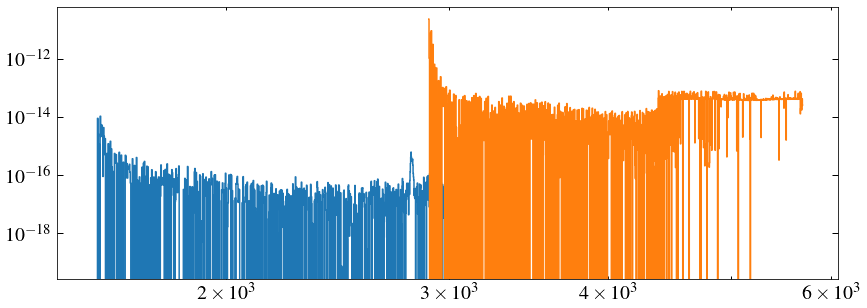

GJ15A


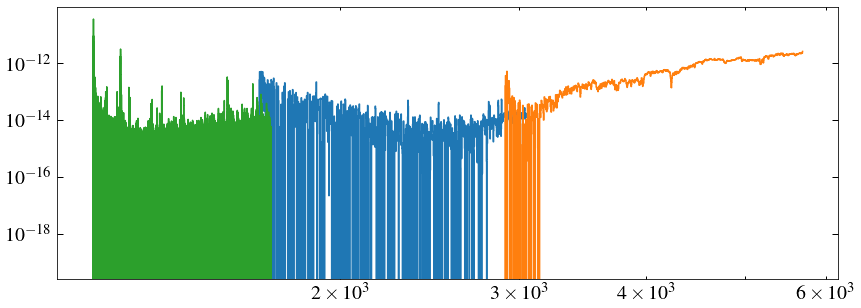

GJ163


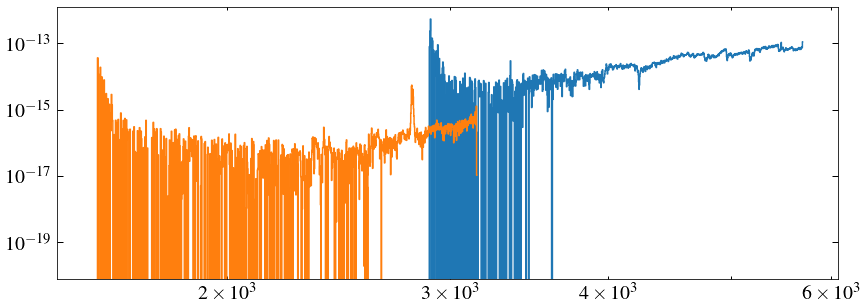

GJ649


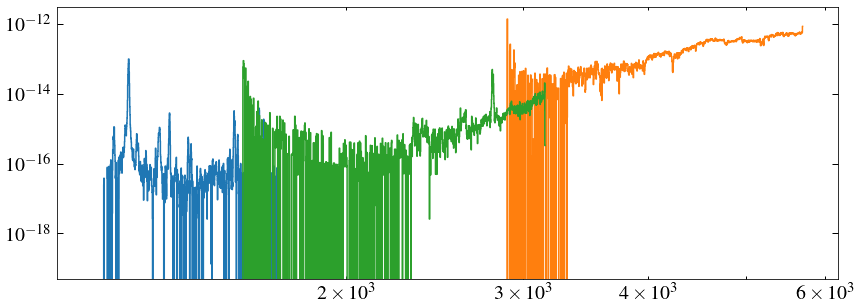

GJ674


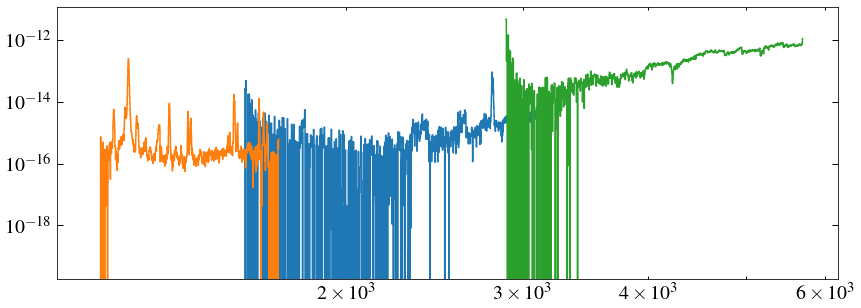

GJ676A


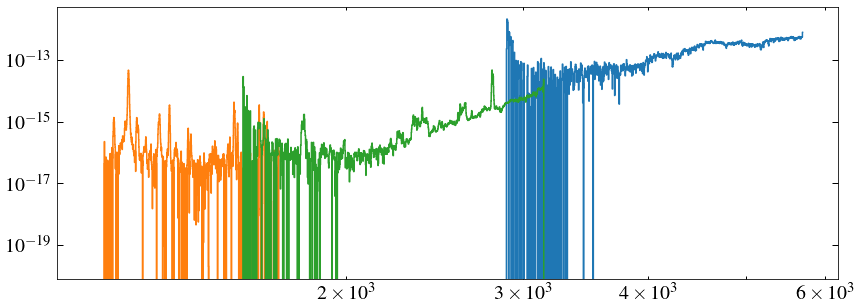

GJ699


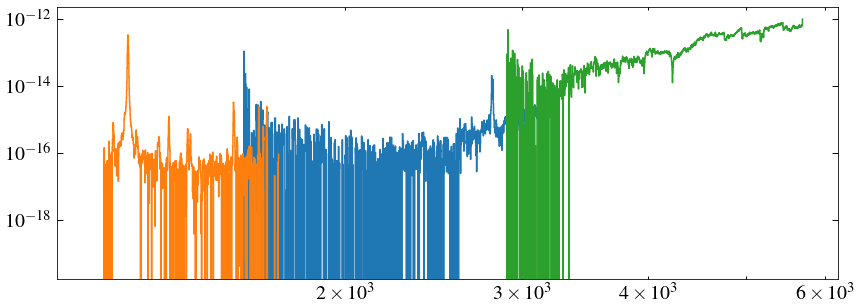

GJ729


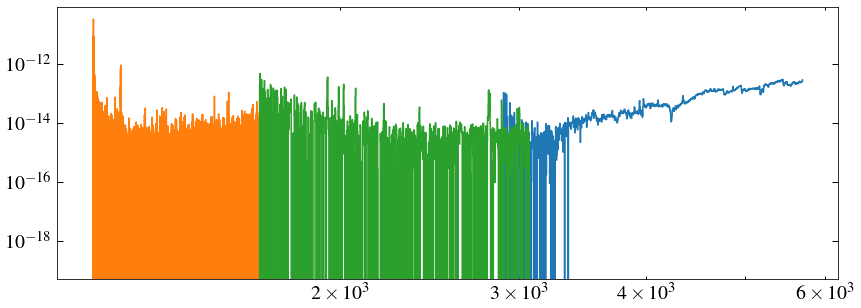

GJ849


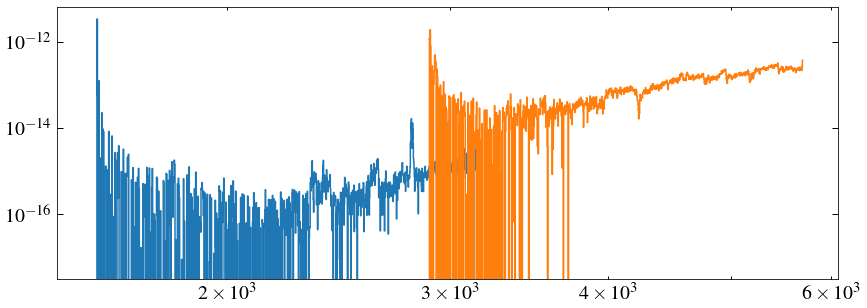

L-980-5


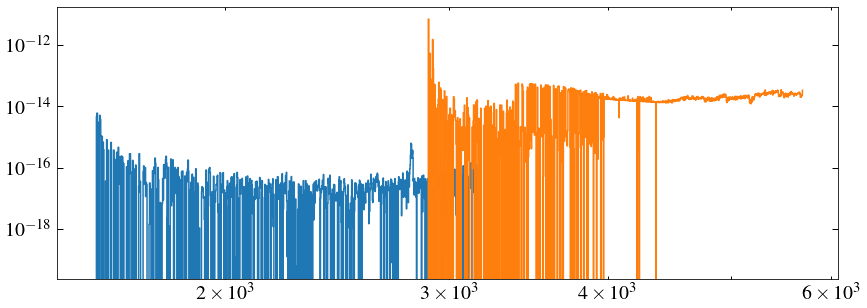

LHS-2686


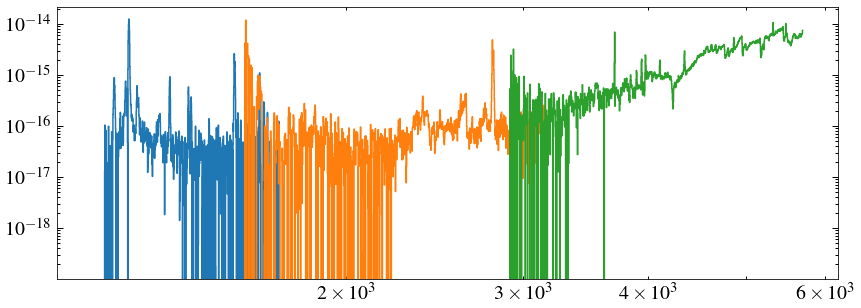

In [38]:
for star in stars:
    print(star)
    specs = glob.glob('stis_test_output/'+star+'/*ecsv')
    for spec in specs:
        data= Table.read(spec)
        if data.meta['GRATING'] not in ['G140M']:
             plt.step(data['WAVELENGTH'], data['FLUX'], where='mid')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()


Also need Tom Ayre's E140M data...

In [11]:
for star in stars:
   # print(star)
    specs = glob.glob('stis_test_output/'+star+'/*ecsv')
    for spec in specs:
        data= Table.read(spec)
        if data.meta['GRATING'] == 'E140M':
            print(star)

GJ15A
GJ729


In [12]:
e140ms = glob.glob('ayres_e140m/*sav*')
e140ms

['ayres_e140m/GJ15A_E140M_coadd.sav', 'ayres_e140m/GJ729_E140M_coadd.sav']

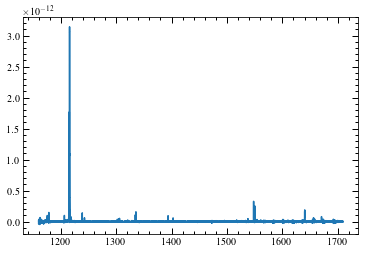

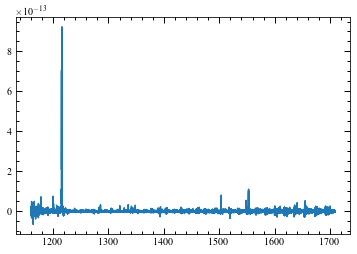

In [13]:
for x in e140ms:
    data = readsav(x)
    w, f, e = data['wave'], data['flux'], data['photerr']
    mask = (w > 1160)
    w, f, e = w[mask], f[mask], e[mask] 
    plt.step(w, f, where='mid')
    plt.show()

In [14]:
data

{'wave': array([1140.25640181, 1140.26872572, 1140.28104939, ..., 1709.19704977,
        1709.2151071 , 1709.23316407]),
 'flux': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.3985969e-15, -1.6855089e-16, -1.2834798e-15], dtype=float32),
 'photerr': array([0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 5.554578e-15,
        5.151277e-15, 5.261830e-15], dtype=float32),
 'epsilon': array([500, 500, 500, ...,   0,   0,   0], dtype=int16),
 'texpt': array([    0.  ,     0.  ,     0.  , ..., 18061.35, 18061.35, 17242.2 ],
       dtype=float32),
 'xorder': array([129., 129., 129., ...,  87.,  87.,  87.]),
 'total_texps': 18061.35,
 'total_counts': 49019.207}

In [15]:
#plt.plot(data['wave'], data['epsilon'])

The ones with e140m data also had G230LB observations, need to figure that out.

In [20]:
for star in ['GJ15A', 'GJ729']:
    print(os.listdir(path+star))

['odlm08010_sx1.fits', 'odlm08030_x1d.fits', 'odlm08040_x1d.fits', 'odlm08050_x1d.fits', 'odlm08060_x1d.fits', 'odlm09010_sx1.fits', 'odlm09030_x1d.fits', 'odlm09040_x1d.fits', 'odlm09050_x1d.fits', 'odlm09060_x1d.fits']
['odlm37010_sx1.fits', 'odlm37030_x1d.fits', 'odlm37040_x1d.fits', 'odlm37050_x1d.fits', 'odlm37060_x1d.fits', 'odlm38010_sx1.fits', 'odlm38030_x1d.fits', 'odlm38040_x1d.fits', 'odlm38050_x1d.fits']


Now to sort by grating

GJ1132


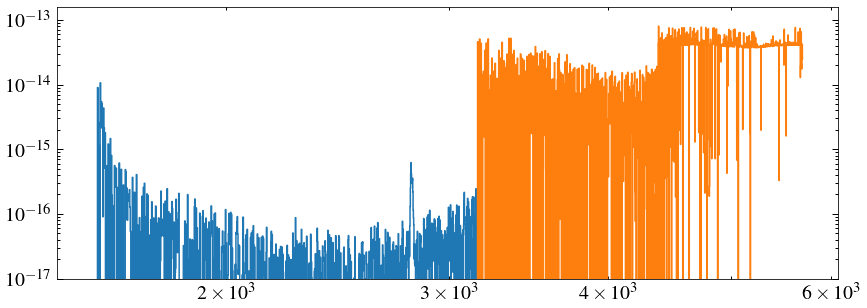

GJ15A


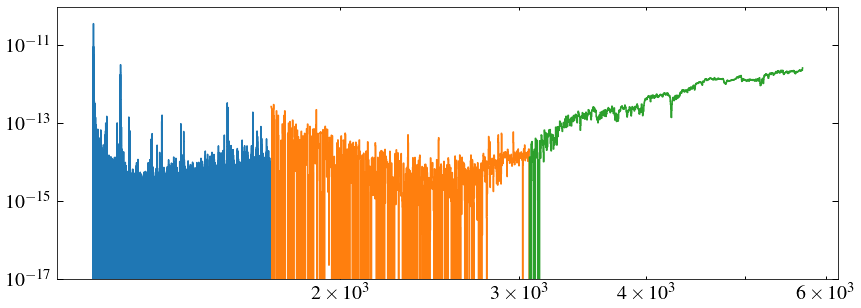

GJ163


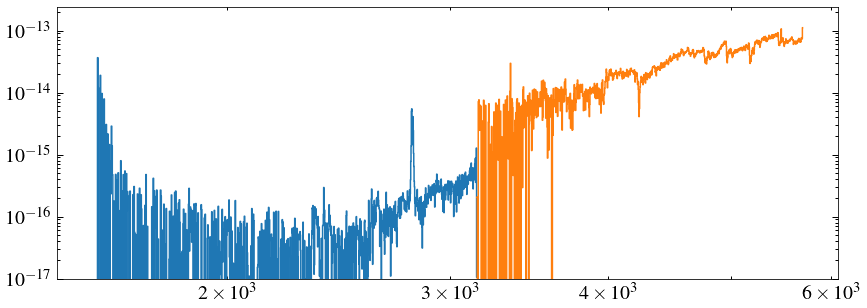

GJ649


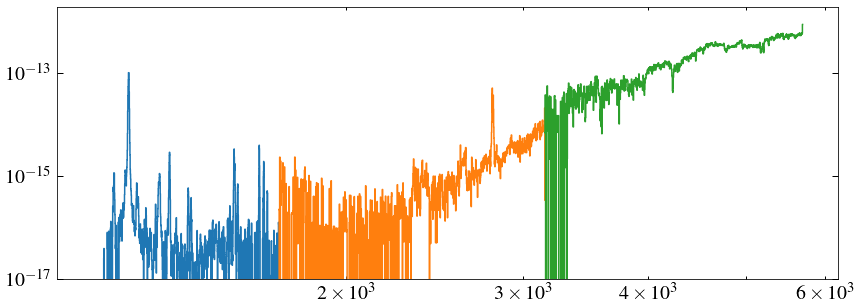

GJ674


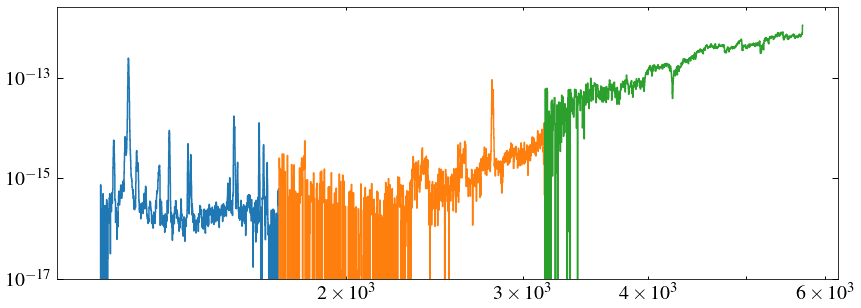

GJ676A


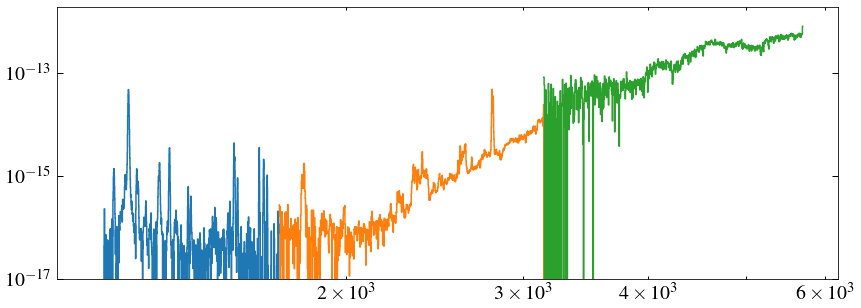

GJ699


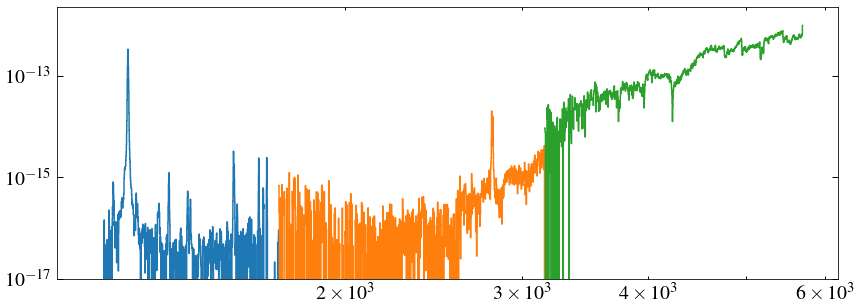

GJ729


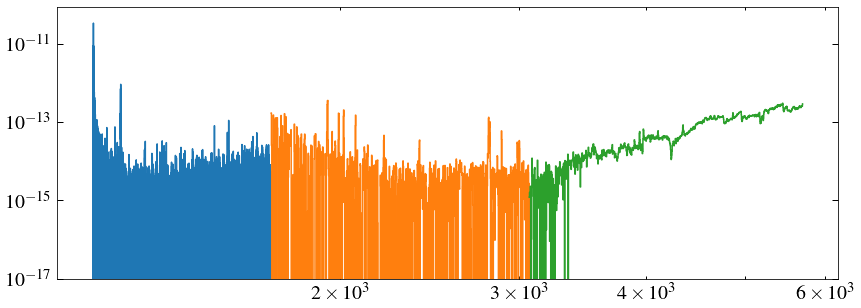

GJ849


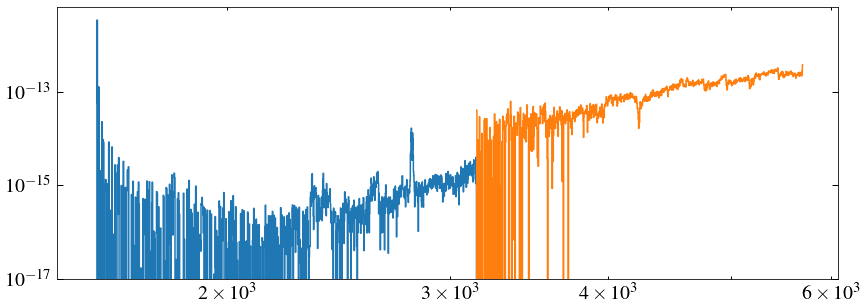

L-980-5


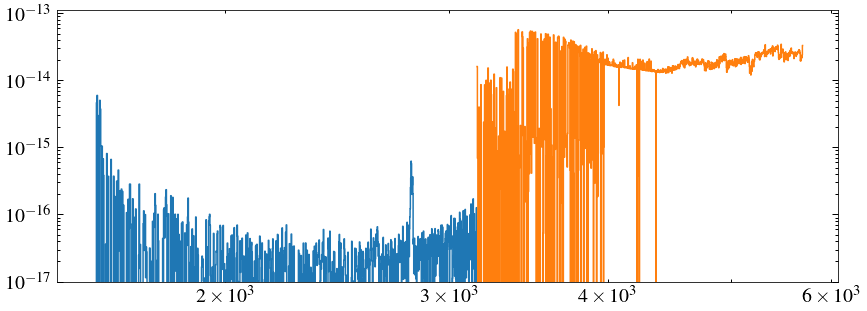

LHS-2686


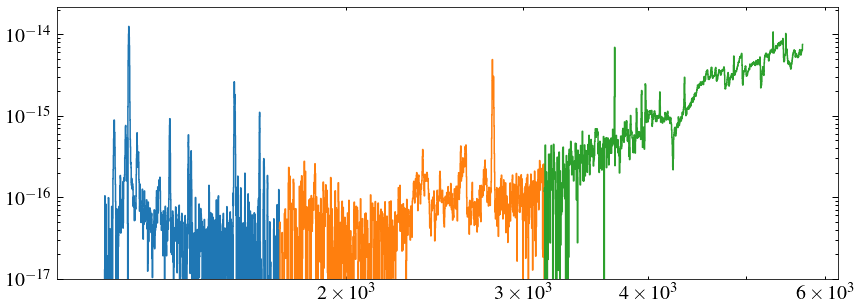

In [87]:
grating_order = ['E140M', 'G140L', 'G230L', 'G230LB', 'G430L']
for star in stars:
    print(star)
    specs = glob.glob('stis_test_output/{}/*ecsv'.format(star))
    w1 = 0
    for grating in grating_order:
        for spec in specs:
            data= Table.read(spec)
            if data.meta['GRATING'] == grating:
                w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
                mask = (w > w1)
                w, f, e = w[mask], f[mask], e[mask]
                plt.step(w, f, where='mid')
                w1 = w[-1]
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-17)
    plt.show()
        

GJ1132


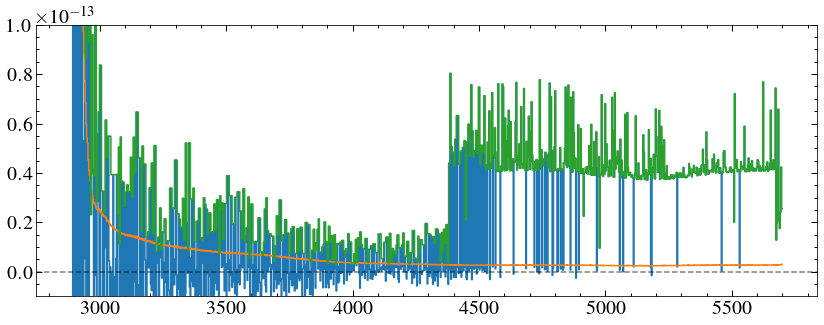

L-980-5


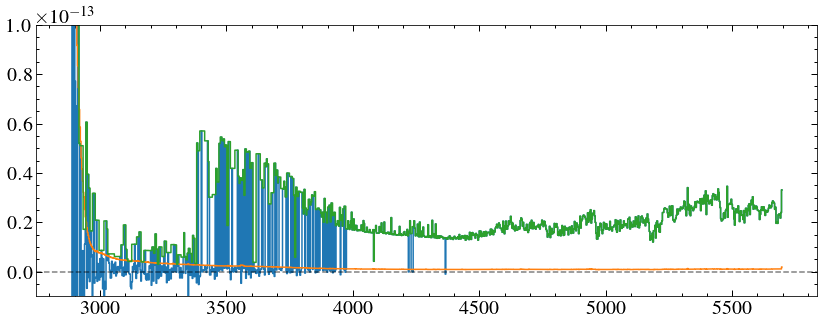

In [58]:
# GJ1132,L-980-5 have very strange G430L spectra
test_stars = ['GJ1132', 'L-980-5']
for star in test_stars:
    print(star)
    specs = glob.glob('stis_test_output/'+star+'/*ecsv')
    for spec in specs:
        data= Table.read(spec)
        if data.meta['GRATING'] == 'G430L':
            w, f, e , dq = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
            plt.step(w,f, where='mid')
            plt.step(w, e, where='mid')
            mask = dq < 16384
        
            w, f, e = w[mask], f[mask], e[mask]
            plt.step(w,f, where='mid')
            plt.axhline(0, ls='--', c='k',alpha=0.5 )
   # plt.xscale('log')
    #plt.yscale('log')
            plt.ylim(-0.1e-13, 1e-13)
            plt.show()
          #  plt.plot(w, dq)
           # plt.show()

In [36]:
fits.getdata(path+'GJ1132/odlm03010_sx1.fits', 1)['A2CENTER']

array([893.0073], dtype=float32)

Maybe they really do jump there? Leave it for now, add the Lya and COS data - scalings? Neglecting Trappist-1 from here.

In [61]:
stars = ['GJ1132',
 'GJ15A',
 'GJ163',
 'GJ649',
 'GJ674',
 'GJ676A',
 'GJ699',
 'GJ729',
 'GJ849',
 'L-980-5',
 'LHS-2686']

In [64]:
cospath = '/media/david/5tb_storage1/muscles/kf_cos/'
cossavs = glob.glob(cospath+'*sav')

GJ1132


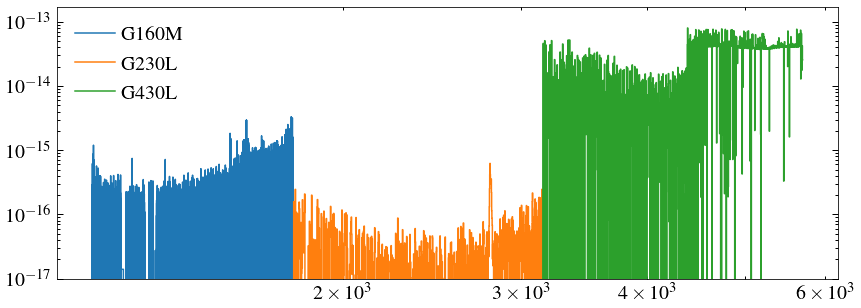

GJ15A


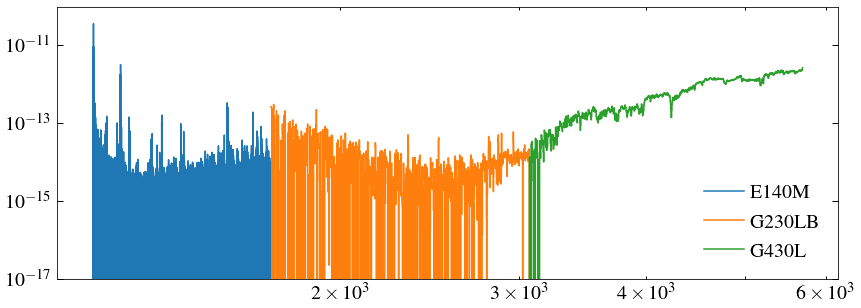

GJ163


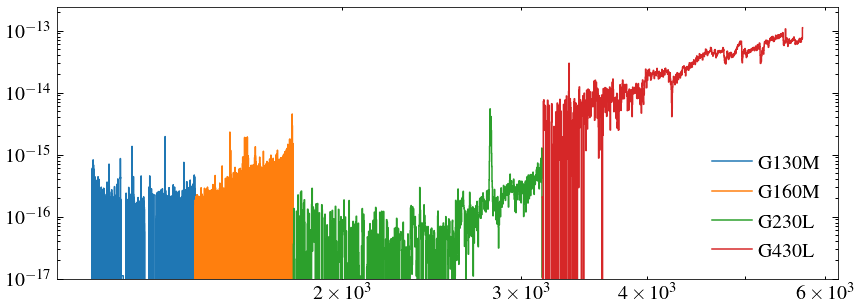

GJ649


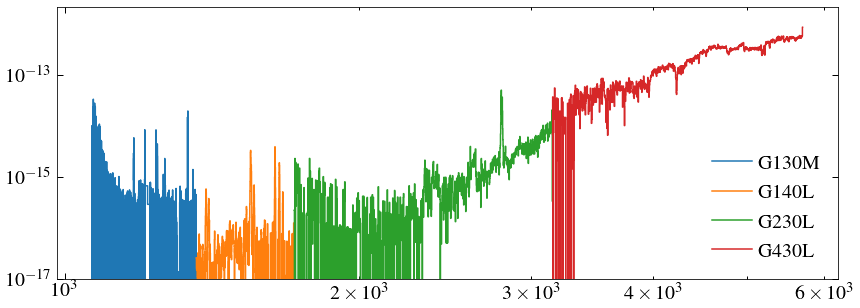

GJ674


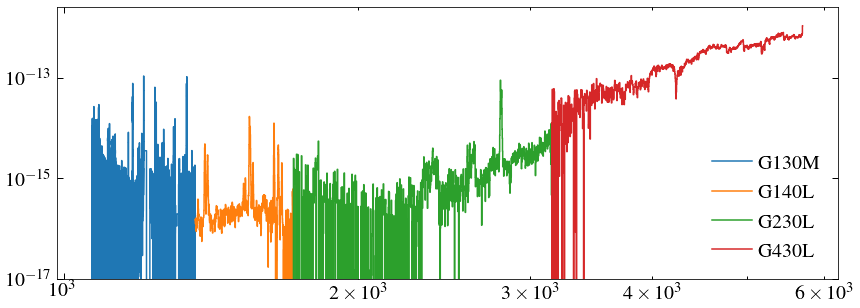

GJ676A


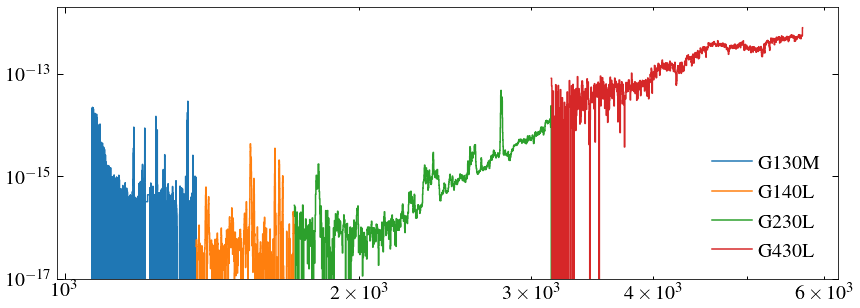

GJ699


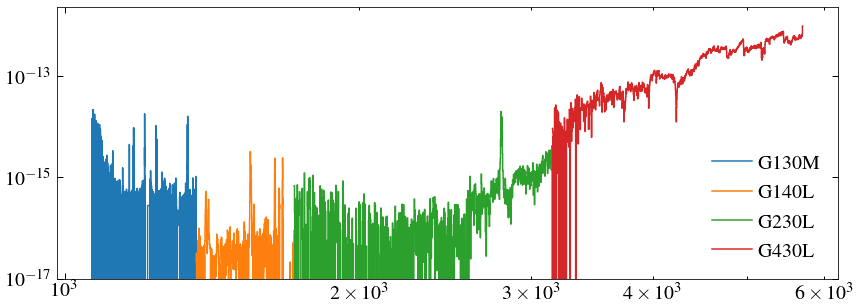

GJ729


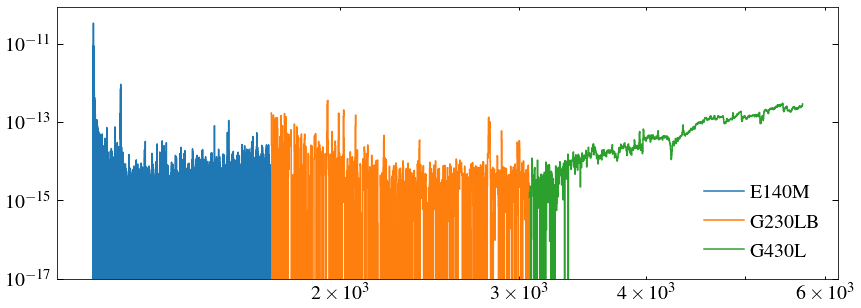

GJ849


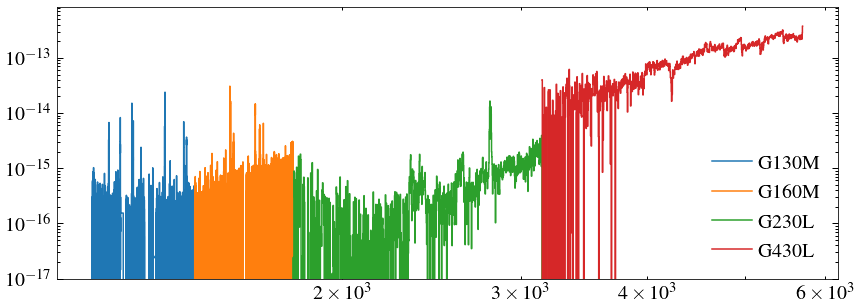

L-980-5


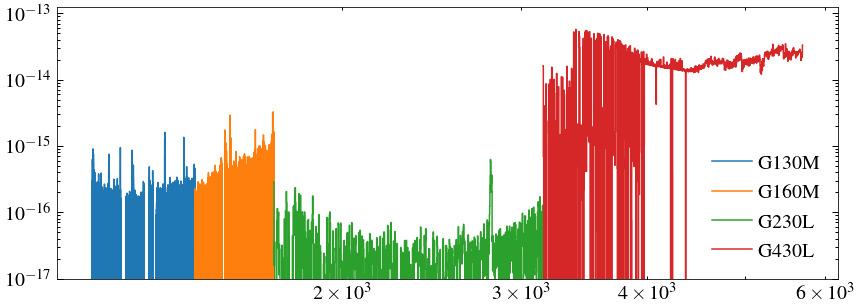

LHS-2686


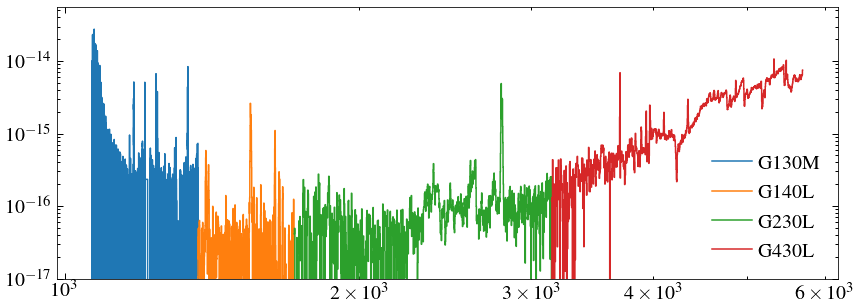

In [124]:
airmask =  [1207, 1222, 1300, 1310, 1353, 1356]
cos_gratings = ['G130M', 'G160M']
for star in stars:
    print(star)
    w1 = 0
    for grating in cos_gratings:
        for sav in cossavs:
            data = readsav(sav)
            if str(data['targname']) == "b'{}'".format(star) and str(data['grating'][0]) == "b'{}'".format(grating) :
                w, f, e = data['wave'], data['flux'], data['err']
                mask = (w < airmask[0]) | (w > airmask[1]) & (w < airmask[2]) | (w > airmask[3]) & (w < airmask[4]) | (w > airmask[5]) 
                w, f, e = w[mask], f[mask], e[mask]
                mask = (w > w1)
                w, f, e = w[mask], f[mask], e[mask]
                plt.step(w,f, where='mid', label=grating)
                w1 = w[-1]
    specs = glob.glob('stis_test_output/{}/*ecsv'.format(star))

    for grating in grating_order:
        for spec in specs:
            data= Table.read(spec)
            if data.meta['GRATING'] == grating:
                w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
                mask = (w > w1)
                w, f, e = w[mask], f[mask], e[mask]
                plt.step(w, f, where='mid', label=grating)
                w1 = w[-1]
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-17)
    plt.show()

Adding lyman alapha and g140m

In [128]:
lyapath = '/media/david/5tb_storage1/muscles/lya_reconstructions/'
lyafiles = glob.glob(lyapath+'/*.txt')
#lyafiles

/media/david/5tb_storage1/muscles/lya_reconstructions/GJ1132_MCMC_results.txt
/media/david/5tb_storage1/muscles/lya_reconstructions/GJ15A_MCMC_results.txt
/media/david/5tb_storage1/muscles/lya_reconstructions/GJ163_MCMC_results.txt
/media/david/5tb_storage1/muscles/lya_reconstructions/GJ649_MCMC_results.txt
/media/david/5tb_storage1/muscles/lya_reconstructions/GJ674_MCMC_results.txt
/media/david/5tb_storage1/muscles/lya_reconstructions/GJ676A_MCMC_results.txt
/media/david/5tb_storage1/muscles/lya_reconstructions/GJ699_MCMC_results_fix.txt
/media/david/5tb_storage1/muscles/lya_reconstructions/GJ729_MCMC_results.txt
/media/david/5tb_storage1/muscles/lya_reconstructions/GJ849_MCMC_results.txt
/media/david/5tb_storage1/muscles/lya_reconstructions/LHS2686_MCMC_results.txt
/media/david/5tb_storage1/muscles/lya_reconstructions/TRAPPIST1_MCMC_results.txt


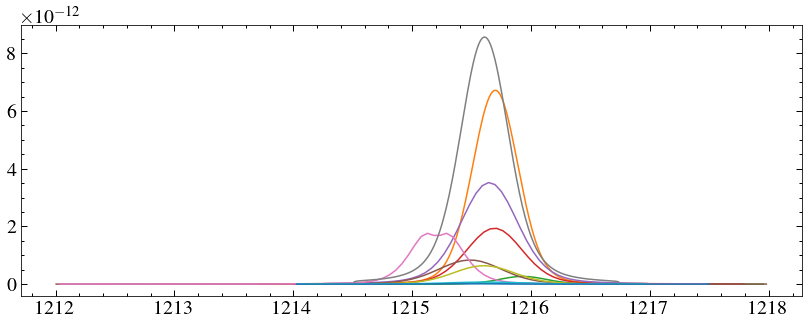

In [122]:
for lya in lyafiles:
    print(lya)
    data = Table.read(lya, format='ascii')
    w = data['wave']
    f = data['LyA_intrinsic_profile_bestfit'] + data['cont']
    plt.plot(w,f)

   # plt.show()

In [155]:
import prepare_model
for star in stars:
    if star != 'L-980-5':
    #print(star)
        path = ''
        if star == 'LHS-2686':
            path = '/media/david/5tb_storage1/muscles/lya_reconstructions/LHS2686_MCMC_results.txt'
        else:
            for lya in lyafiles:
                if os.path.split(lya)[1] == '{}_MCMC_results.txt'.format(star):
                    path = lya
        data = Table.read(path, format='ascii')
        w = data['wave']
        f = data['LyA_intrinsic_profile_bestfit'] + data['cont']
               # plt.plot(w,f)
        savdat = Table([w, f], names =['WAVELENGTH', 'FLUX'])
        ascii.write(savdat, 'lya_intermediates/{}_lya_basic.txt'.format(star), format='csv', overwrite=True )

In [157]:
for star in stars:
    if star != 'L-980-5':
        print(star)
        lyafile = 'lya_intermediates/{}_lya_basic.txt'.format(star)
        specs = glob.glob('stis_test_output/{}/*ecsv'.format(star))
        lya_spec = 'stis_test_output/{0}/hlsp_muscles_hst_stis_{1}_g140m_v1_component-spec.ecsv'.format(star, star.lower())
        if lya_spec not in specs:
            lya_spec = 'stis_test_output/{0}/hlsp_muscles_hst_stis_{1}_e140m_v1_component-spec.ecsv'.format(star, star.lower())

        spec = Table.read(lya_spec)
        prepare_model.make_model_spectrum(lyafile, 1, spec ,savepath = 'lya_hlsp/', save_ecsv=True, save_fits=False, normfac=1.0)



GJ1132
lya_hlsp/
Spectrum saved as hlsp_muscles_model_lya-reconstruction_gj1132_na_v1_component-spec.ecsv
GJ15A
lya_hlsp/
Spectrum saved as hlsp_muscles_model_lya-reconstruction_gj15a_na_v1_component-spec.ecsv
GJ163
lya_hlsp/
Spectrum saved as hlsp_muscles_model_lya-reconstruction_gj163_na_v1_component-spec.ecsv
GJ649
lya_hlsp/
Spectrum saved as hlsp_muscles_model_lya-reconstruction_gj649_na_v1_component-spec.ecsv
GJ674
lya_hlsp/
Spectrum saved as hlsp_muscles_model_lya-reconstruction_gj674_na_v1_component-spec.ecsv
GJ676A
lya_hlsp/
Spectrum saved as hlsp_muscles_model_lya-reconstruction_gj676a_na_v1_component-spec.ecsv
GJ699
lya_hlsp/
Spectrum saved as hlsp_muscles_model_lya-reconstruction_gj699_na_v1_component-spec.ecsv
GJ729
lya_hlsp/
Spectrum saved as hlsp_muscles_model_lya-reconstruction_gj729_na_v1_component-spec.ecsv
GJ849
lya_hlsp/
Spectrum saved as hlsp_muscles_model_lya-reconstruction_gj849_na_v1_component-spec.ecsv
LHS-2686
lya_hlsp/
Spectrum saved as hlsp_muscles_model_lya-

In [158]:
lya_files = glob.glob('lya_hlsp/*.ecsv')
Table.read(lya_files[0]).meta

OrderedDict([('AIRORVAC', 'vac'),
             ('DEC_TARG', 4.74810340755),
             ('FLUXMAX', 1.7600979915186938e-12),
             ('FLUXMIN', 5.805250429125091e-16),
             ('FLUXUNIT', 'erg/s/cm2/ang'),
             ('GRATING', 'NA'),
             ('HLSPACRN', 'MUSCLES'),
             ('HLSPLEAD', 'David J. Wilson'),
             ('HLSPNAME',
              'Measurements of the Ultraviolet Spectral Characteristics of Low-mass Exoplanet Host Stars'),
             ('INSTRUME', 'LYA-RECONSTRUCTION'),
             ('NORMFAC', 1.0),
             ('PROPOSID', 15071),
             ('PR_INV_F', 'Cynthia'),
             ('PR_INV_L', 'Froning'),
             ('RA_TARG', 269.447952129),
             ('SPECRES', 1214.75545717118),
             ('TARGNAME', 'GJ699'),
             ('TELESCOP', 'Model'),
             ('WAVEMAX', 1217.47650468999),
             ('WAVEMIN', 1212.03350856195),
             ('WAVERES', 0.05336253098994348),
             ('WAVEUNIT', 'ang')])

In [172]:
cossavs = glob.glob('cos_savs/*.sav')

GJ1132


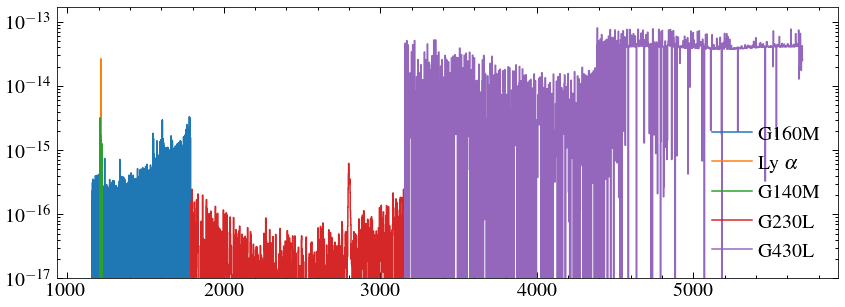

GJ15A


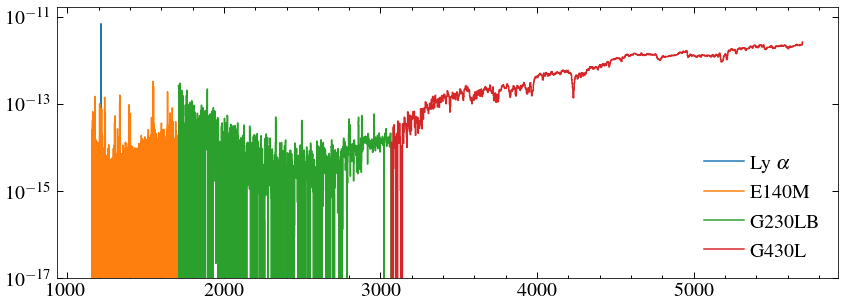

GJ163


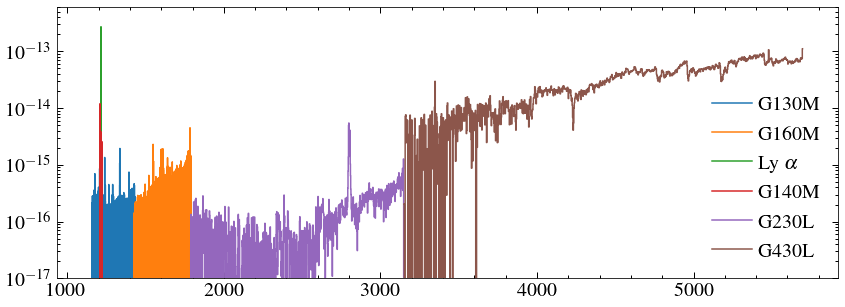

GJ649


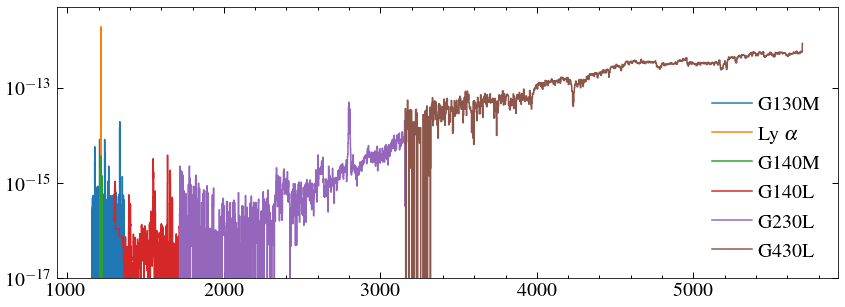

GJ674


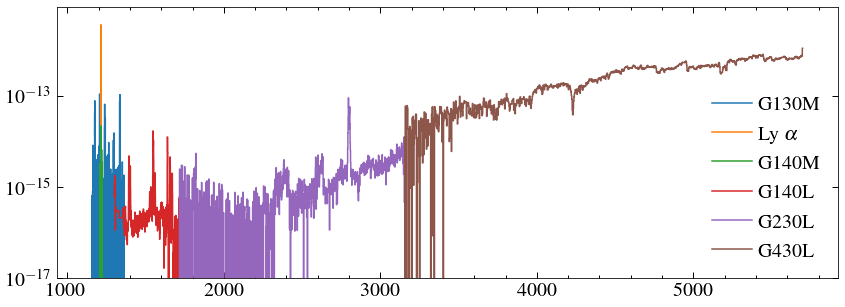

GJ676A


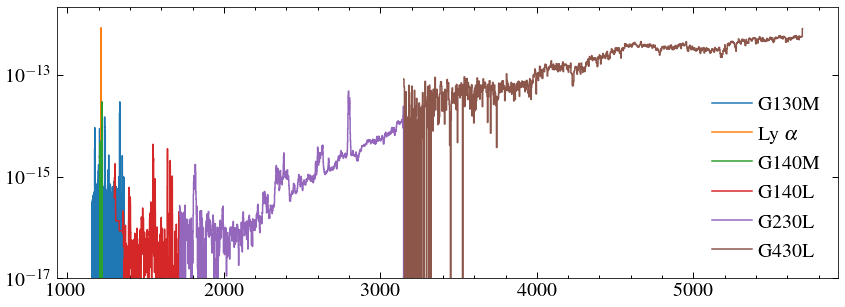

GJ699


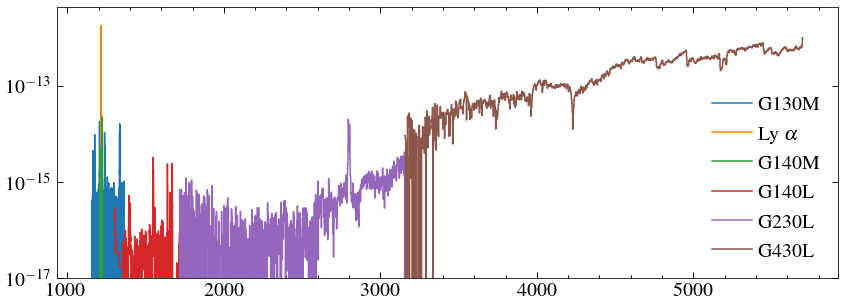

GJ729


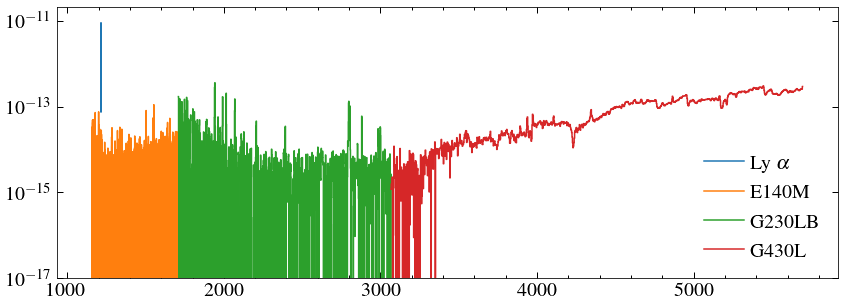

GJ849


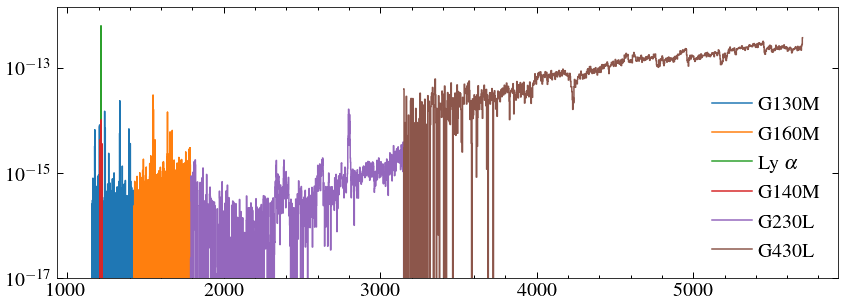

L-980-5


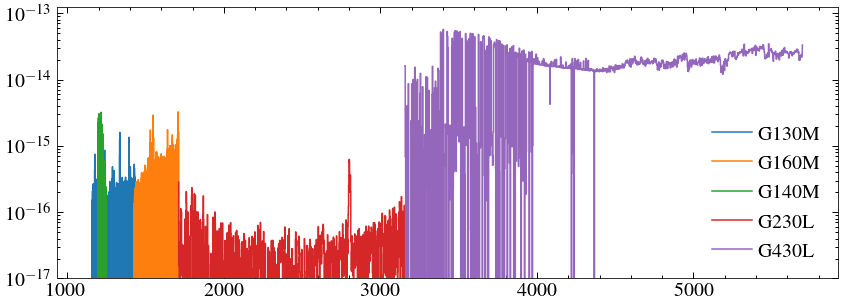

LHS-2686


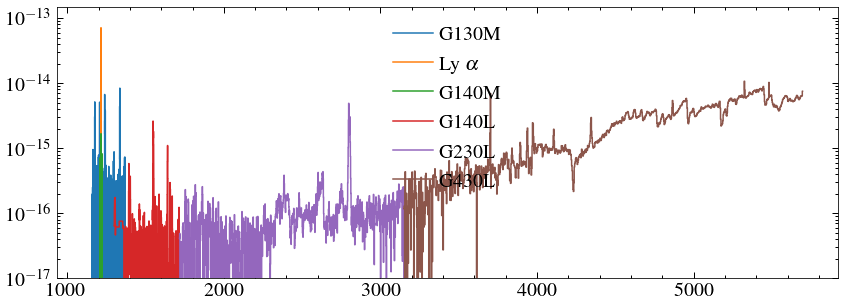

In [231]:
w_full = np.array([], dtype=float)
f_full = np.array([], dtype=float)
e_full = np.array([], dtype=float)
airmask =  [1207, 1222, 1300, 1310, 1353, 1356]
cos_gratings = ['G130M', 'G160M']
stis_gratings = ['G140M','E140M','G140L', 'G230L', 'G230LB', 'G430L']
for star in stars:
    print(star)
    w1 = 1160
    for grating in cos_gratings:
        for sav in cossavs:
            data = readsav(sav)
            if str(data['targname']) == "b'{}'".format(star) and str(data['grating'][0]) == "b'{}'".format(grating) :
                w, f, e = data['wave'], data['flux'], data['err']
                mask = (w < airmask[0]) | (w > airmask[1]) & (w < airmask[2]) | (w > airmask[3]) & (w < airmask[4]) | (w > airmask[5]) 
                w, f, e = w[mask], f[mask], e[mask]
                mask = (w > w1)
                w, f, e = w[mask], f[mask], e[mask]
                plt.step(w,f, where='mid', label=grating)
                w1 = w[-1]
                w_full = np.concatenate((w_full, np.array(w)))
                f_full = np.concatenate((f_full, np.array(f)))
                e_full = np.concatenate((e_full, np.array(e)))
    
    lw0, lw1 = 1000000, 0 #placeholder so L-980-5 works
    for lya in lya_files:
        data = Table.read(lya)
        if data.meta['TARGNAME'] == star:
            w, f = data['WAVELENGTH'], data['FLUX']
            plt.step(w, f, where='mid', label=r'Ly $\alpha$')
            lw0, lw1 = w[0], w[-1]
            w_full = np.concatenate((w_full, np.array(w)))
            f_full = np.concatenate((f_full, np.array(f)))
            e_full = np.concatenate((e_full, np.zeros(len(w))))
            

    specs = glob.glob('stis_test_output/{}/*ecsv'.format(star))
    for grating in stis_gratings:
        for spec in specs:
            data= Table.read(spec)
            if data.meta['GRATING'] == grating:
                w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
                if grating == 'G140M':
                    mask = (w > 1207) & (w < lw0) | (w > lw1) & (w < 1222) 
                elif grating == 'G140L':
                    mask = (w > 1300) & (w < 1310) | (w > 1353) & (w < 1356) | (w > w1)
                    w1 = w[-1]
                elif grating == 'E140M':
                    mask =  (w > w1) & (w < lw0) | (w > lw1)
                    w1 = w[-1]
                else:
                    mask = (w > w1)
                    w1 = w[-1]
                w, f, e = w[mask], f[mask], e[mask]
                smooth = 2
               # if grating =='G430L':
                #    f = convolve(np.array(f),Box1DKernel(smooth))
                 #   e = convolve(np.array(e),Box1DKernel(smooth))/(smooth**0.5)
                plt.step(w, f, where='mid', label=grating)
                w_full = np.concatenate((w_full, np.array(w)))
                f_full = np.concatenate((f_full, np.array(f)))
                e_full = np.concatenate((e_full, np.array(e)))
                
    plt.legend()
    #plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-17)
    plt.show()
    args = np.argsort(w_full)
    w_full, f_full, e_full = w_full[args], f_full[args], e_full[args] 
    savdat = Table([w_full*u.AA, f_full*u.erg/u.s/u.cm**2/u.AA, e_full*u.erg/u.s/u.cm**2/u.AA], names=['WAVELENGTH', 'FLUX', 'ERROR'])
    ascii.write(savdat, 'uv_first_pass/{}_hst_v1.ecsv'.format(star), format='ecsv', overwrite=True)


GJ1132


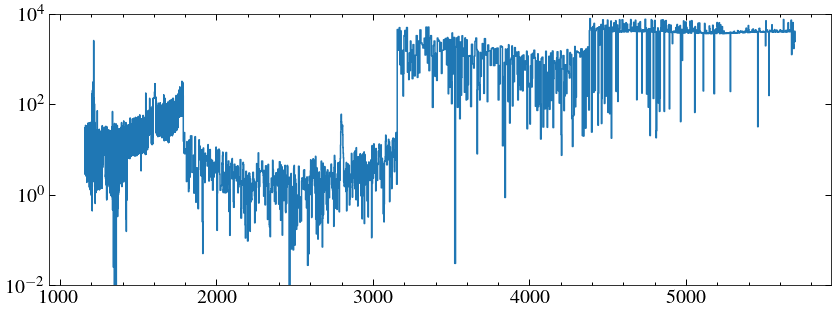

GJ15A


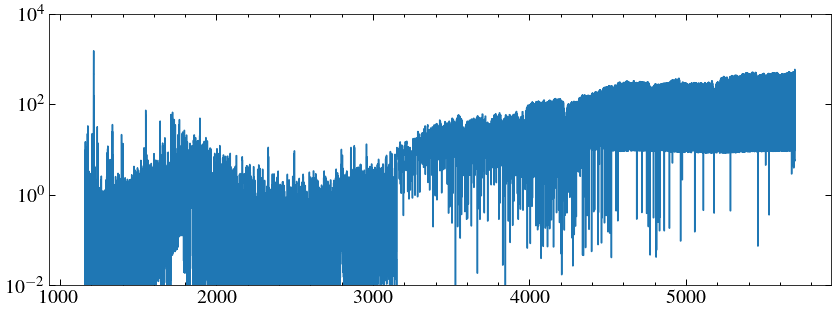

GJ163


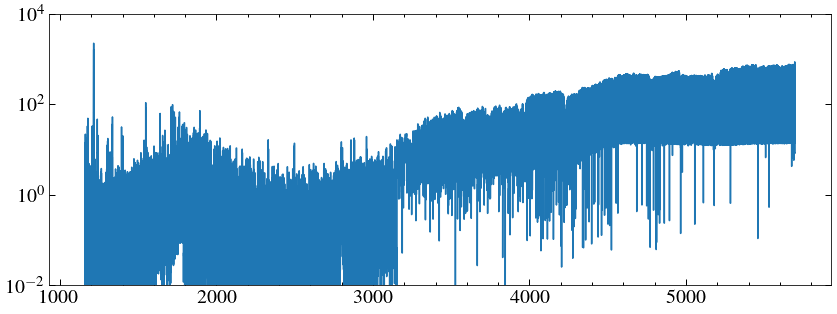

GJ649


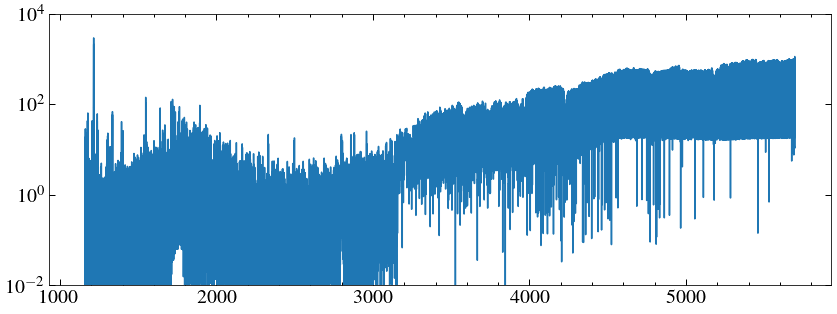

GJ674


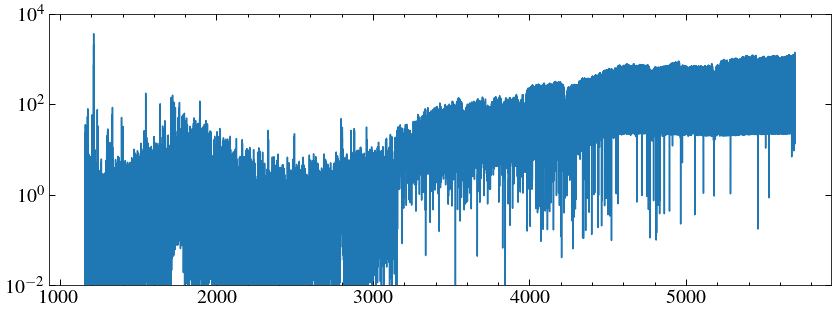

GJ676A


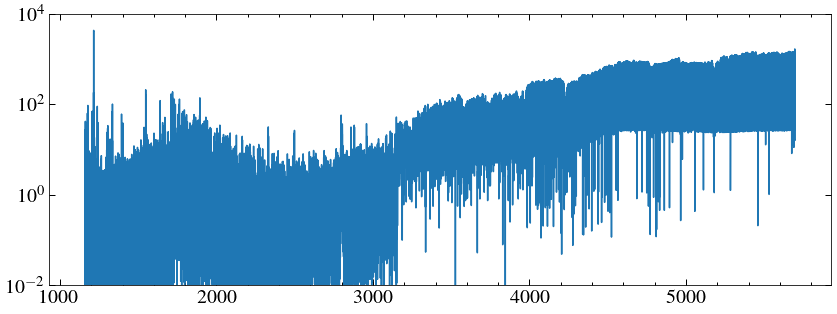

GJ699


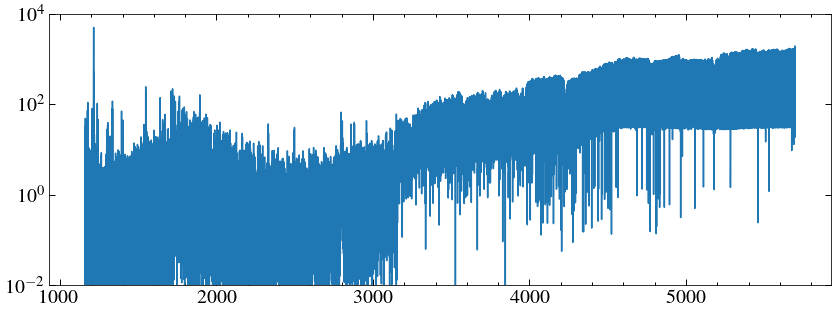

GJ729


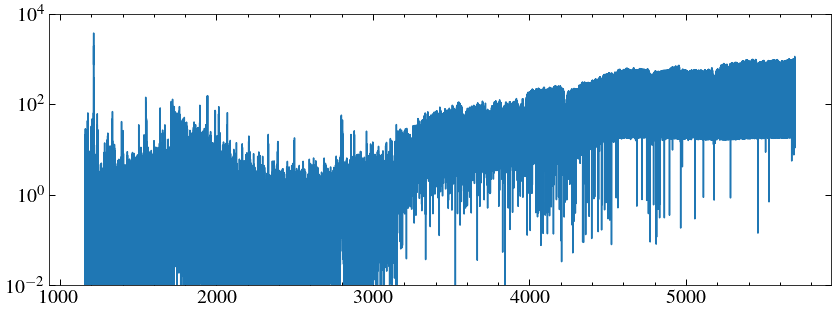

GJ849


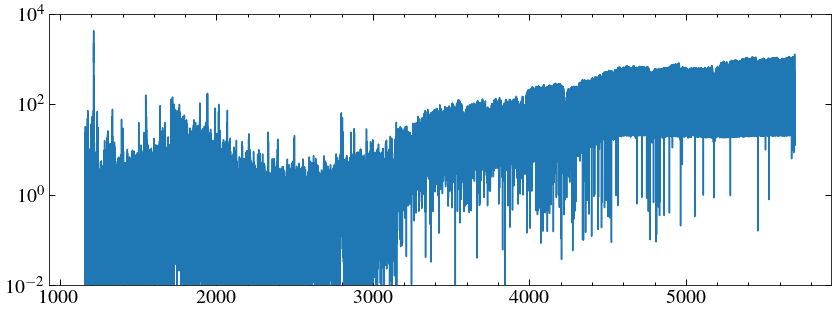

L-980-5


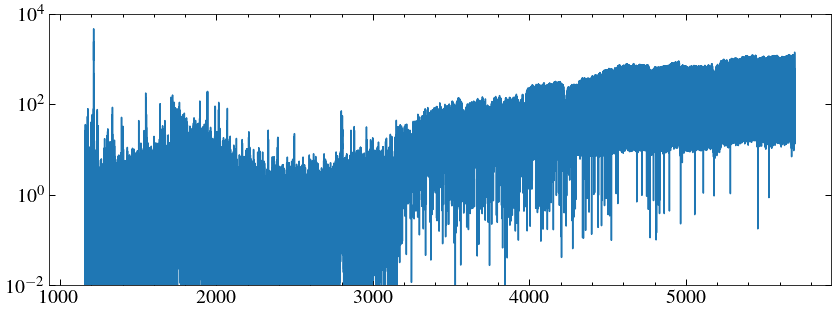

LHS-2686


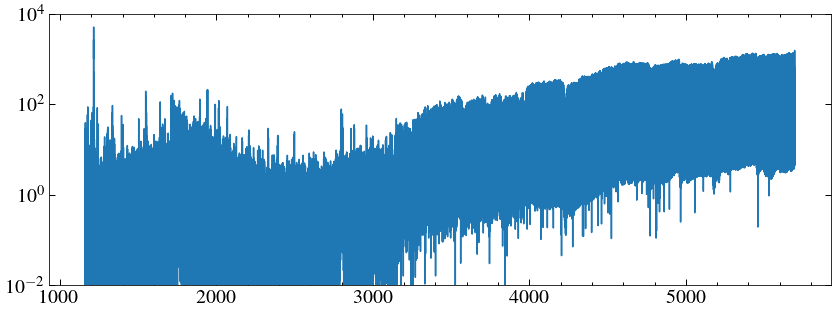

In [239]:
uv_specs = glob.glob('uv_first_pass/*.ecsv')
for star in stars:
    print(star)
    for spec in uv_specs:
        if spec == 'uv_first_pass/{}_hst_v1.ecsv'.format(star):
            data= Table.read(spec)
            w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
          
          #  w, f = resample.bintogrid(w, f , dx=2)
            #mask = f>0
            #w, f = w[mask], f[mask]
            
            scale = np.mean(f[(w>2000) & (w < 2100)])
            f /= scale
            mask = f>0
            w, f = w[mask], f[mask]
            
            plt.step(w, f, where='mid')
            plt.yscale('log')
            #plt.xscale('log')
            plt.ylim(1e-2, 1e4)
            #plt.xlim(1750, 1850)
            plt.show()
            

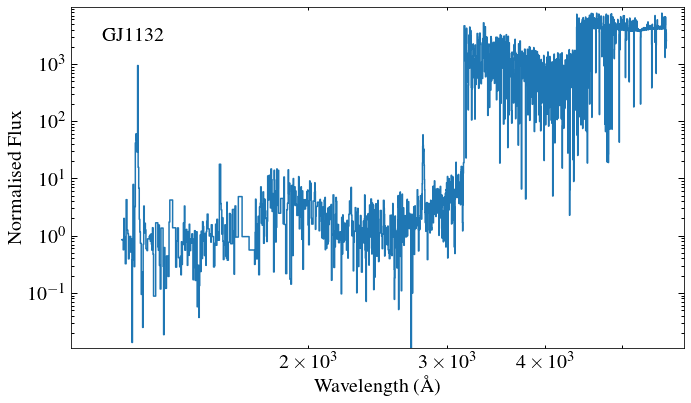

In [230]:
from matplotlib.animation import FuncAnimation




fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.set_tight_layout(True)

ax.set_ylim(1.1e-2, 9.9e3)
ax.set_xlim(1001, 5999)
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim(1214.01, 1217.99)
ax.set_ylabel('Normalised Flux')
ax.set_xlabel('Wavelength (\AA)')
#ax.set_xlabel('Velocity (km\,s$^{-1}$)')

line1, = ax.step([0,0],[0,0], where='mid', label='_')
note1 = ax.annotate('', (0.05, 0.9), xycoords ='axes fraction' )
#w_dop = (w_new*u.AA).to(u.km/u.s, equivalencies= u.doppler_optical(1215.44*u.AA))
#line2 = ax.plot(w_dop, f_new, c='C3', alpha=1, ls='--')

def update(i):
    data = Table.read('uv_first_pass/{}_hst_v1.ecsv'.format(stars[i]))

       
    w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
          
    w, f = resample.bintogrid(w, f , dx=2)


    scale = np.mean(f[(w>2000) & (w < 2100)])
    f /= scale
    mask = f>0
    w, f = w[mask], f[mask]
    line1.set_xdata(w)
    line1.set_ydata(f)

    note1.set_text(stars[i])

    return ax, line1, note1

anim = FuncAnimation(fig, update, frames=np.arange(len(stars)), interval=400)
plt.tight_layout()
#anim.save('gj1132_test.gif', dpi=80, writer='imagemagick')
anim.save('uv_1stpass.gif', dpi=80, writer='imagemagick')
plt.show()